<a href="https://colab.research.google.com/github/JuliaoAmaral/doutorado/blob/main/acoplamento(resumo_palavras_chaves).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Monte o Google Drive no Google Colab:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Instalções Necessárias:
!pip install python-igraph


# Importações necessárias
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr, spearmanr
import numpy as np
!pip install xlsxwriter
import xlsxwriter
import igraph as ig
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.1 MB/s eta 0:00:00


In [3]:
#Passo 01: Importação dos Dados

# Carregue o arquivo excel em um dataframe
df = pd.read_excel('/content/drive/MyDrive/Doutorado/Tese/Bancos de Dados/Metadados_Artigos.xlsx')

# Verifique se os dados foram carregados corretamente
print(df.head())

                                              Índice  \
0                                    M. Rovai (2019)   
1  B. Kauss; M. Polidoro; A. Costa; D. Canavese (...   
2                                     R. Cruz (2021)   
3                                M. Carvalho (2018a)   
4                                    S. Matos (2021)   

                Nome do Periódico  \
0                         Anos 90   
1            Saúde Soc. São Paulo   
2   Cahiers des Amériques latines   
3                   cadernos pagu   
4  Revista Humanidades e Inovação   

                                             Títulos  \
0  [' “Que Possamos Ser o que Somos”: memórias  s...   
1  [' “Semente para Luta”: ativismos, direito à s...   
2  [' “Sou gay e o movimento LGBTQI+ não me repre...   
3  [' “Travesti”, “mulher transexual”,  “homem tr...   
4  [' A LUTA POR UMA IDENTIDADE  COLETIVA: ASPECT...   

                                             Autores  \
0              [' Marta Gouveia de Oliveira Rov

In [4]:
# Passo 02: Pré-processamento dos Dados

# Baixe as stopwords em português e outros recursos necessários
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')

# Defina as stopwords em português
stop_words = set(stopwords.words('portuguese'))

# Crie o stemmer
stemmer = RSLPStemmer()

# Função para pré-processar os dados
def preprocess_data(text):
    if pd.isna(text):
        return ""

    # Tokenize o texto
    word_tokens = word_tokenize(text)

    # Remova as stopwords, faça o stemming e coloque as palavras em minúsculas
    filtered_text = [stemmer.stem(word.lower()) for word in word_tokens if word.casefold() not in stop_words]

    return filtered_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [5]:
# Passo 03: Análise das Palavras-Chave

# Pré-processar as palavras-chave
df['Palavras-Chave'] = df['Palavras-Chave'].apply(preprocess_data)

# Verifique se os dados foram pré-processados corretamente
display(df[['Palavras-Chave']].head())

# Junte as palavras-chave de cada documento em uma única string
df['Palavras-Chave'] = df['Palavras-Chave'].apply(' '.join)

# Vetorização das palavras-chave
vectorizer_palavras_chave = CountVectorizer().fit_transform(df['Palavras-Chave'])

# Calcular a similaridade do cosseno entre os vetores das palavras-chave
cosine_sim_palavras_chave = cosine_similarity(vectorizer_palavras_chave)

# Exibir a matriz de similaridade do cosseno das palavras-chave
print("Matriz de Similaridade do Cosseno - Palavras-Chave:")
display(cosine_sim_palavras_chave)

# Análise Estatística - Palavras-Chave
cosine_sim_palavras_chave_flat = cosine_sim_palavras_chave.flatten()

pearson_corr_palavras_chave, _ = pearsonr(cosine_sim_palavras_chave_flat, cosine_sim_palavras_chave_flat)
spearman_corr_palavras_chave, _ = spearmanr(cosine_sim_palavras_chave_flat, cosine_sim_palavras_chave_flat)

# Imprimir os resultados de correlação das palavras-chave
print(f"Correlação de Pearson - Palavras-Chave: {pearson_corr_palavras_chave}")
print(f"Correlação de Spearman - Palavras-Chave: {spearman_corr_palavras_chave}")

Palavras-Chave
0  [[, ', mov, gay, alfen, ., memór, ., histór, ....
1  [[, ', lgbt, ;, covid-19, ;, mov, soc, ;, dire...
2  [[, ', lgbtqi+, ,, brasil, ,, ativ, gay, direi...
3  [[, ', mov, soc, ,, ident, ,, gêner, ,, cl, so...
4  [[, ', mov, lgbt, ., eth, discurs, ., referenc...

Matriz de Similaridade do Cosseno - Palavras-Chave:


array([[1.        , 0.15430335, 0.10540926, ..., 0.24618298, 0.18257419,
        0.12909944],
       [0.15430335, 1.        , 0.09759001, ..., 0.45584231, 0.50709255,
        0.11952286],
       [0.10540926, 0.09759001, 1.        , ..., 0.23354968, 0.11547005,
        0.08164966],
       ...,
       [0.24618298, 0.45584231, 0.23354968, ..., 1.        , 0.40451992,
        0.28603878],
       [0.18257419, 0.50709255, 0.11547005, ..., 0.40451992, 1.        ,
        0.14142136],
       [0.12909944, 0.11952286, 0.08164966, ..., 0.28603878, 0.14142136,
        1.        ]])

Correlação de Pearson - Palavras-Chave: 0.9999999999999929
Correlação de Spearman - Palavras-Chave: 1.0


In [6]:
# Passo 04: Análise dos Resumos

# Pré-processar os resumos
df['Resumo'] = df['Resumo'].apply(preprocess_data)

# Verifique se os dados foram pré-processados corretamente
display(df[['Resumo']].head())

# Junte os resumos de cada documento em uma única string
df['Resumo'] = df['Resumo'].apply(' '.join)

# Vetorização dos resumos
vectorizer_resumo = CountVectorizer().fit_transform(df['Resumo'])

# Calcular a similaridade do cosseno entre os vetores dos resumos
cosine_sim_resumo = cosine_similarity(vectorizer_resumo)

# Exibir a matriz de similaridade do cosseno dos resumos
print("Matriz de Similaridade do Cosseno - Resumos:")
display(cosine_sim_resumo)

# Análise Estatística - Resumos
cosine_sim_resumo_flat = cosine_sim_resumo.flatten()

pearson_corr_resumo, _ = pearsonr(cosine_sim_resumo_flat, cosine_sim_resumo_flat)
spearman_corr_resumo, _ = spearmanr(cosine_sim_resumo_flat, cosine_sim_resumo_flat)

# Imprimir os resultados de correlação dos resumos
print(f"Correlação de Pearson - Resumos: {pearson_corr_resumo}")
print(f"Correlação de Spearman - Resumos: {spearman_corr_resumo}")

Resumo
0  [artig, pretend, apresent, part, pesquis, nasc...
1  [trabalh, investig, saúd, pesso, lésb, ,, gay,...
2  [artig, busc, mape, emerg, ativ, gay, direit, ...
3  [artig, abord, construç, ident, polít, mov, tr...
4  [efervesc, discuss, contemporâne, sobr, proble...

Matriz de Similaridade do Cosseno - Resumos:


array([[1.        , 0.18344146, 0.167147  , ..., 0.16620132, 0.24568714,
        0.14834771],
       [0.18344146, 1.        , 0.19108288, ..., 0.24560138, 0.21332758,
        0.07462025],
       [0.167147  , 0.19108288, 1.        , ..., 0.26606937, 0.14136615,
        0.12803688],
       ...,
       [0.16620132, 0.24560138, 0.26606937, ..., 1.        , 0.17457431,
        0.14456126],
       [0.24568714, 0.21332758, 0.14136615, ..., 0.17457431, 1.        ,
        0.11731115],
       [0.14834771, 0.07462025, 0.12803688, ..., 0.14456126, 0.11731115,
        1.        ]])

Correlação de Pearson - Resumos: 1.0
Correlação de Spearman - Resumos: 1.0


In [7]:
# Passo 05: Salvar em Excel:

# Suponha que df['Índice'] contém o Índice dos artigos (títulos ou identificadores)
titles = df['Índice']

# Criação dos DataFrames de similaridade para Palavras-Chave e Resumos
df_sim_palavras_chave = pd.DataFrame(cosine_sim_palavras_chave, index=titles, columns=titles)
df_sim_resumo = pd.DataFrame(cosine_sim_resumo, index=titles, columns=titles)

# Criação de um DataFrame para as correlações de Pearson e Spearman para Palavras-Chave
df_corr_palavras_chave = pd.DataFrame({
    'Correlação de Pearson': [pearson_corr_palavras_chave],
    'Correlação de Spearman': [spearman_corr_palavras_chave]
})

# Criação de um DataFrame para as correlações de Pearson e Spearman para Resumos
df_corr_resumo = pd.DataFrame({
    'Correlação de Pearson': [pearson_corr_resumo],
    'Correlação de Spearman': [spearman_corr_resumo]
})

# Caminho completo para o arquivo no Google Drive
caminho_arquivo_sim_coss = '/content/drive/MyDrive/Doutorado/Tese/Bancos de Dados/Acoplamento_de_Analises/similaridade_analises.xlsx'

# Salvando os DataFrames em um arquivo Excel com múltiplas abas
with pd.ExcelWriter(caminho_arquivo_sim_coss, engine='xlsxwriter') as writer:

    # Salvar a matriz de similaridade para Palavras-Chave
    df_sim_palavras_chave.to_excel(writer, sheet_name='Sim_Cosseno_PalavrasChave', index=True)

    # Salvar as correlações para Palavras-Chave
    df_corr_palavras_chave.to_excel(writer, sheet_name='Correlacoes_PalavrasChave', index=False)

    # Salvar a matriz de similaridade para Resumos
    df_sim_resumo.to_excel(writer, sheet_name='Sim_Cosseno_Resumos', index=True)

    # Salvar as correlações para Resumos
    df_corr_resumo.to_excel(writer, sheet_name='Correlacoes_Resumos', index=False)

print(f'Resultados salvos em {caminho_arquivo_sim_coss}')


Resultados salvos em /content/drive/MyDrive/Doutorado/Tese/Bancos de Dados/Acoplamento_de_Analises/similaridade_analises.xlsx


Clusterização

In [8]:
# Caminho do arquivo com as similaridades de cosseno
caminho_arquivo_sim_coss = '/content/drive/MyDrive/Doutorado/Tese/Bancos de Dados/Acoplamento_de_Analises/similaridade_analises.xlsx'

# Carregar as abas "Sim_Cosseno_PalavrasChave" e "Sim_Cosseno_Resumos"
df_sim_palavras_chave = pd.read_excel(caminho_arquivo_sim_coss, sheet_name='Sim_Cosseno_PalavrasChave')
df_sim_resumos = pd.read_excel(caminho_arquivo_sim_coss, sheet_name='Sim_Cosseno_Resumos')

In [9]:
# Extrair as matrizes de similaridade de cosseno
cosine_similarity_palavras_chave = df_sim_palavras_chave.iloc[:, 1:].values
cosine_similarity_resumos = df_sim_resumos.iloc[:, 1:].values

# Função para realizar a clusterização
def realizar_clusterizacao(cosine_similarity_matrix, df_simcoss, titulo_clusterizacao):

    # Normalizar os dados
    scaler = StandardScaler()
    cosine_similarity_matrix_scaled = scaler.fit_transform(cosine_similarity_matrix)

    # Encontrar o número ideal de clusters usando o método Elbow
    inertia = []
    silhouette_scores = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(cosine_similarity_matrix_scaled)
        inertia.append(kmeans.inertia_)
        if k > 2:
            silhouette_scores.append(silhouette_score(cosine_similarity_matrix_scaled, kmeans.labels_))

    # Plotar o método Elbow
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, 11), inertia, marker='o')
    plt.title(f'Método Elbow - {titulo_clusterizacao}')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inércia')
    plt.xticks(range(2, 11))
    plt.show()

    # Plotar o índice de silhueta
    plt.figure(figsize=(10, 5))
    plt.plot(range(3, 11), silhouette_scores, marker='o')
    plt.title(f'Índice de Silhueta - {titulo_clusterizacao}')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Índice de Silhueta')
    plt.xticks(range(3, 11))
    plt.show()

    # Escolher o número ideal de clusters (ajustar com base nos gráficos)
    n_clusters = 4  # Pode ajustar conforme os gráficos

    # Executar o algoritmo K-means com o número de clusters escolhido
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(cosine_similarity_matrix_scaled)

    # Adicionar as etiquetas de cluster ao DataFrame original
    df_simcoss['Cluster'] = kmeans.labels_

    return df_simcoss[['Índice', 'Cluster']]

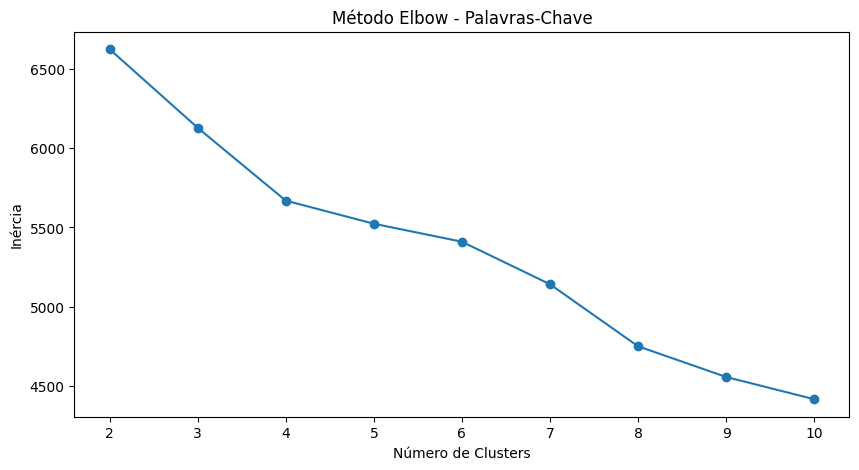

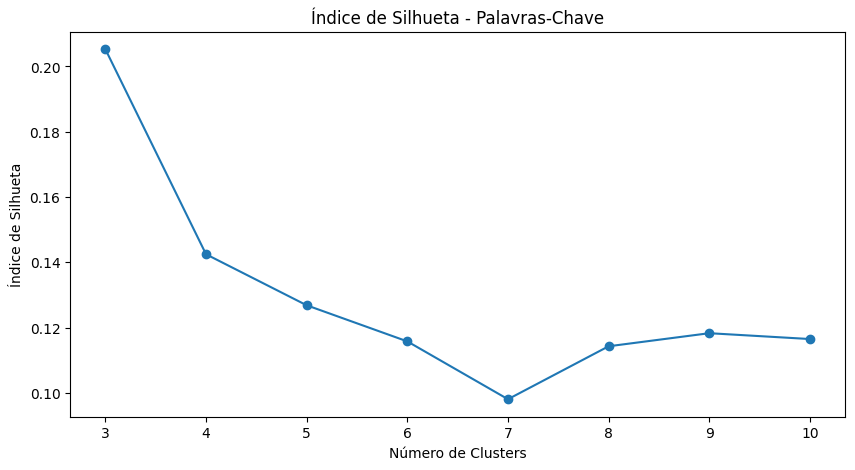

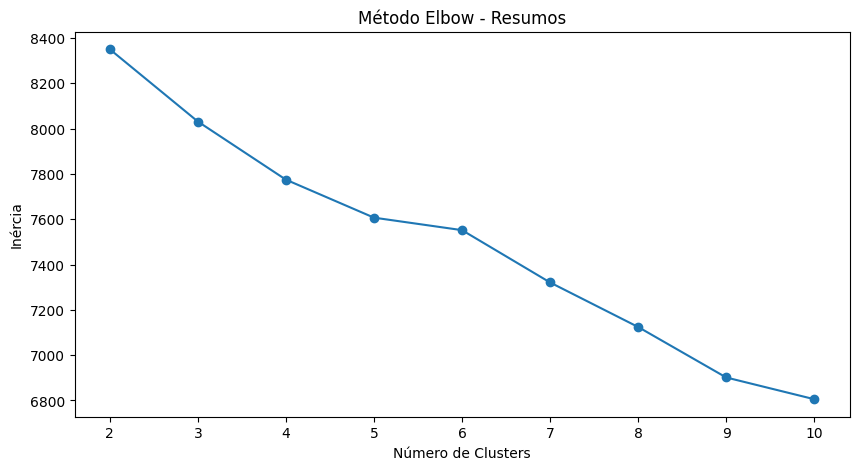

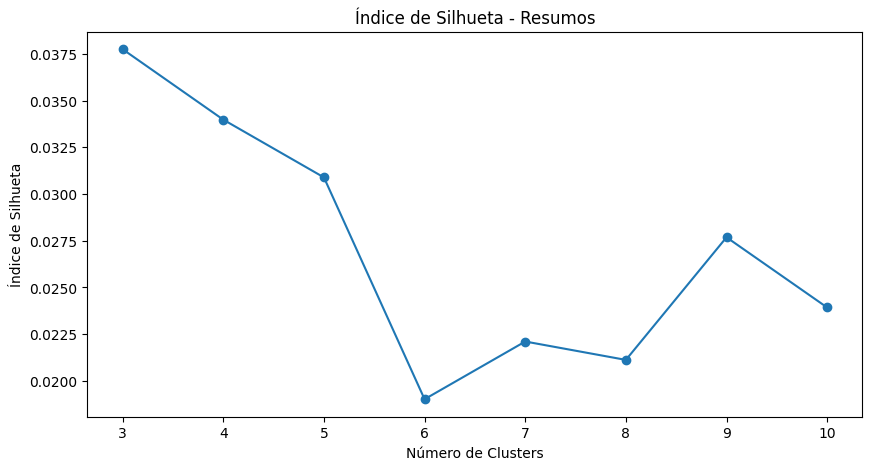

Resultados de clusterização salvos em /content/drive/MyDrive/Doutorado/Tese/Bancos de Dados/Acoplamento_de_Analises/cluster_analises.xlsx


In [10]:
# Realizar a clusterização para Palavras-Chave
df_cluster_palavras_chave = realizar_clusterizacao(cosine_similarity_palavras_chave, df_sim_palavras_chave, 'Palavras-Chave')

# Realizar a clusterização para Resumos
df_cluster_resumos = realizar_clusterizacao(cosine_similarity_resumos, df_sim_resumos, 'Resumos')

# Caminho completo para o arquivo com os resultados dos clusters no Google Drive
caminho_arquivo_cluster = '/content/drive/MyDrive/Doutorado/Tese/Bancos de Dados/Acoplamento_de_Analises/cluster_analises.xlsx'

# Salvar os DataFrames de clusters em um arquivo Excel com múltiplas abas
with pd.ExcelWriter(caminho_arquivo_cluster, engine='xlsxwriter') as writer:
    df_cluster_palavras_chave.to_excel(writer, sheet_name='Cluster_PalavrasChave', index=False)
    df_cluster_resumos.to_excel(writer, sheet_name='Cluster_Resumos', index=False)

print(f'Resultados de clusterização salvos em {caminho_arquivo_cluster}')

Filtro para os Coeficientes acima de 20%:

In [11]:
# Caminho do arquivo Excel com as similaridades de cosseno
caminho_arquivo_sim_coss = '/content/drive/MyDrive/Doutorado/Tese/Bancos de Dados/Acoplamento_de_Analises/similaridade_analises.xlsx'

# Carregar as abas "Sim_Cosseno_PalavrasChave" e "Sim_Cosseno_Resumos"
df_sim_palavras_chave = pd.read_excel(caminho_arquivo_sim_coss, sheet_name='Sim_Cosseno_PalavrasChave')
df_sim_resumos = pd.read_excel(caminho_arquivo_sim_coss, sheet_name='Sim_Cosseno_Resumos')

In [12]:
# Função para filtrar valores acima de 20%
def filtrar_similaridade(df):
    # Converte as células para números, ignorando erros
    df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))

    # Filtra os valores reais diferentes de 1 e maiores ou iguais a 0.20
    df_filtered = df[(df.applymap(np.isreal) & (df != 1) & (df >= 0.20))]

    # Preenche os espaços vazios com zeros
    df_filtered.fillna(0, inplace=True)

    return df_filtered

In [13]:
# Filtrar os dados para Palavras-Chave e Resumos
df_filtered_palavras_chave = filtrar_similaridade(df_sim_palavras_chave)
df_filtered_resumos = filtrar_similaridade(df_sim_resumos)

# Caminho completo para o arquivo Excel filtrado
caminho_arquivo_filt = '/content/drive/MyDrive/Doutorado/Tese/Bancos de Dados/Acoplamento_de_Analises/filt_simcoss_acres.xlsx'

<ipython-input-12-f9670546a621>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))
<ipython-input-12-f9670546a621>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_filtered = df[(df.applymap(np.isreal) & (df != 1) & (df >= 0.20))]
<ipython-input-12-f9670546a621>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))
<ipython-input-12-f9670546a621>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_filtered = df[(df.applymap(np.isreal) & (df != 1) & (df >= 0.20))]


In [14]:
# Salvar os DataFrames filtrados em um arquivo Excel com múltiplas abas
with pd.ExcelWriter(caminho_arquivo_filt, engine='xlsxwriter') as writer:
    df_filtered_palavras_chave.to_excel(writer, sheet_name='Filtro_PalavrasChave', index=False)
    df_filtered_resumos.to_excel(writer, sheet_name='Filtro_Resumos', index=False)

print(f'Resultados filtrados salvos em {caminho_arquivo_filt}')

Resultados filtrados salvos em /content/drive/MyDrive/Doutorado/Tese/Bancos de Dados/Acoplamento_de_Analises/filt_simcoss_acres.xlsx


Gráfico de Redes a partir dos Coeficientes das Similaridades de Cosseno:

In [15]:
# Caminho do arquivo Excel filtrado
caminho_arquivo_filt = '/content/drive/MyDrive/Doutorado/Tese/Bancos de Dados/Acoplamento_de_Analises/filt_simcoss_acres.xlsx'

# Carregar as abas filtradas
df_filt_palavras_chave = pd.read_excel(caminho_arquivo_filt, sheet_name='Filtro_PalavrasChave')
df_filt_resumos = pd.read_excel(caminho_arquivo_filt, sheet_name='Filtro_Resumos')

In [16]:
# Função para criar o gráfico de rede
def criar_grafo(df_filt, titulo_grafo):
    # Extrair índice dos artigos (primeira coluna)
    artigo_indice = titles

    # Criar um grafo não-direcionado
    G = ig.Graph(directed=False)

    # Adicionar os nós (artigos)
    G.add_vertices(len(artigo_indice))

    # Nomear os nós com o índice dos artigos
    G.vs['name'] = artigo_indice

    # Adicionar as arestas ponderadas pela similaridade de cosseno
    for i in range(len(artigo_indice)):
        for j in range(i+1, len(artigo_indice)):  # Evitar repetição e diagonal principal
            similarity = df_filt.iloc[i, j+1]  # A similaridade está nas colunas seguintes
            if similarity > 0.2:  # Apenas adicionar arestas para similaridades acima de 0.20
                G.add_edge(i, j, weight=similarity)

    # Calcular o grau de cada nó
    node_degrees = G.degree()

    # Ajustar o tamanho dos nós de acordo com o grau
    node_sizes = np.array(node_degrees) * 100

    # Calcular o layout do grafo
    layout = G.layout_fruchterman_reingold()

    # Obter as coordenadas dos nós
    Xn, Yn = np.array(layout.coords)[:, 0], np.array(layout.coords)[:, 1]

    # Obter as arestas
    edges = [edge.tuple for edge in G.es]

    # Obter os pesos das arestas
    weights = G.es["weight"]

    # Aumentar o tamanho do gráfico
    plt.figure(figsize=(50, 50))

    # Definir o título do gráfico
    plt.title(titulo_grafo, fontsize=20)

    # Remover os eixos
    plt.axis('off')

    # Desenhar os nós
    plt.scatter(Xn, Yn, c='skyblue', s=node_sizes, alpha=0.5)
    for i, (x, y) in enumerate(zip(Xn, Yn)):
        # Exibir o Índice dos artigos como rótulos
        plt.text(x, y, artigo_indice[i], fontsize=8, ha='center', va='center')

    # Desenhar as arestas
    for edge, weight in zip(edges, weights):
        x = [Xn[edge[0]], Xn[edge[1]]]
        y = [Yn[edge[0]], Yn[edge[1]]]
        plt.plot(x, y, c='red', alpha=weight, linewidth=2)

    # Mostrar o gráfico
    plt.show()

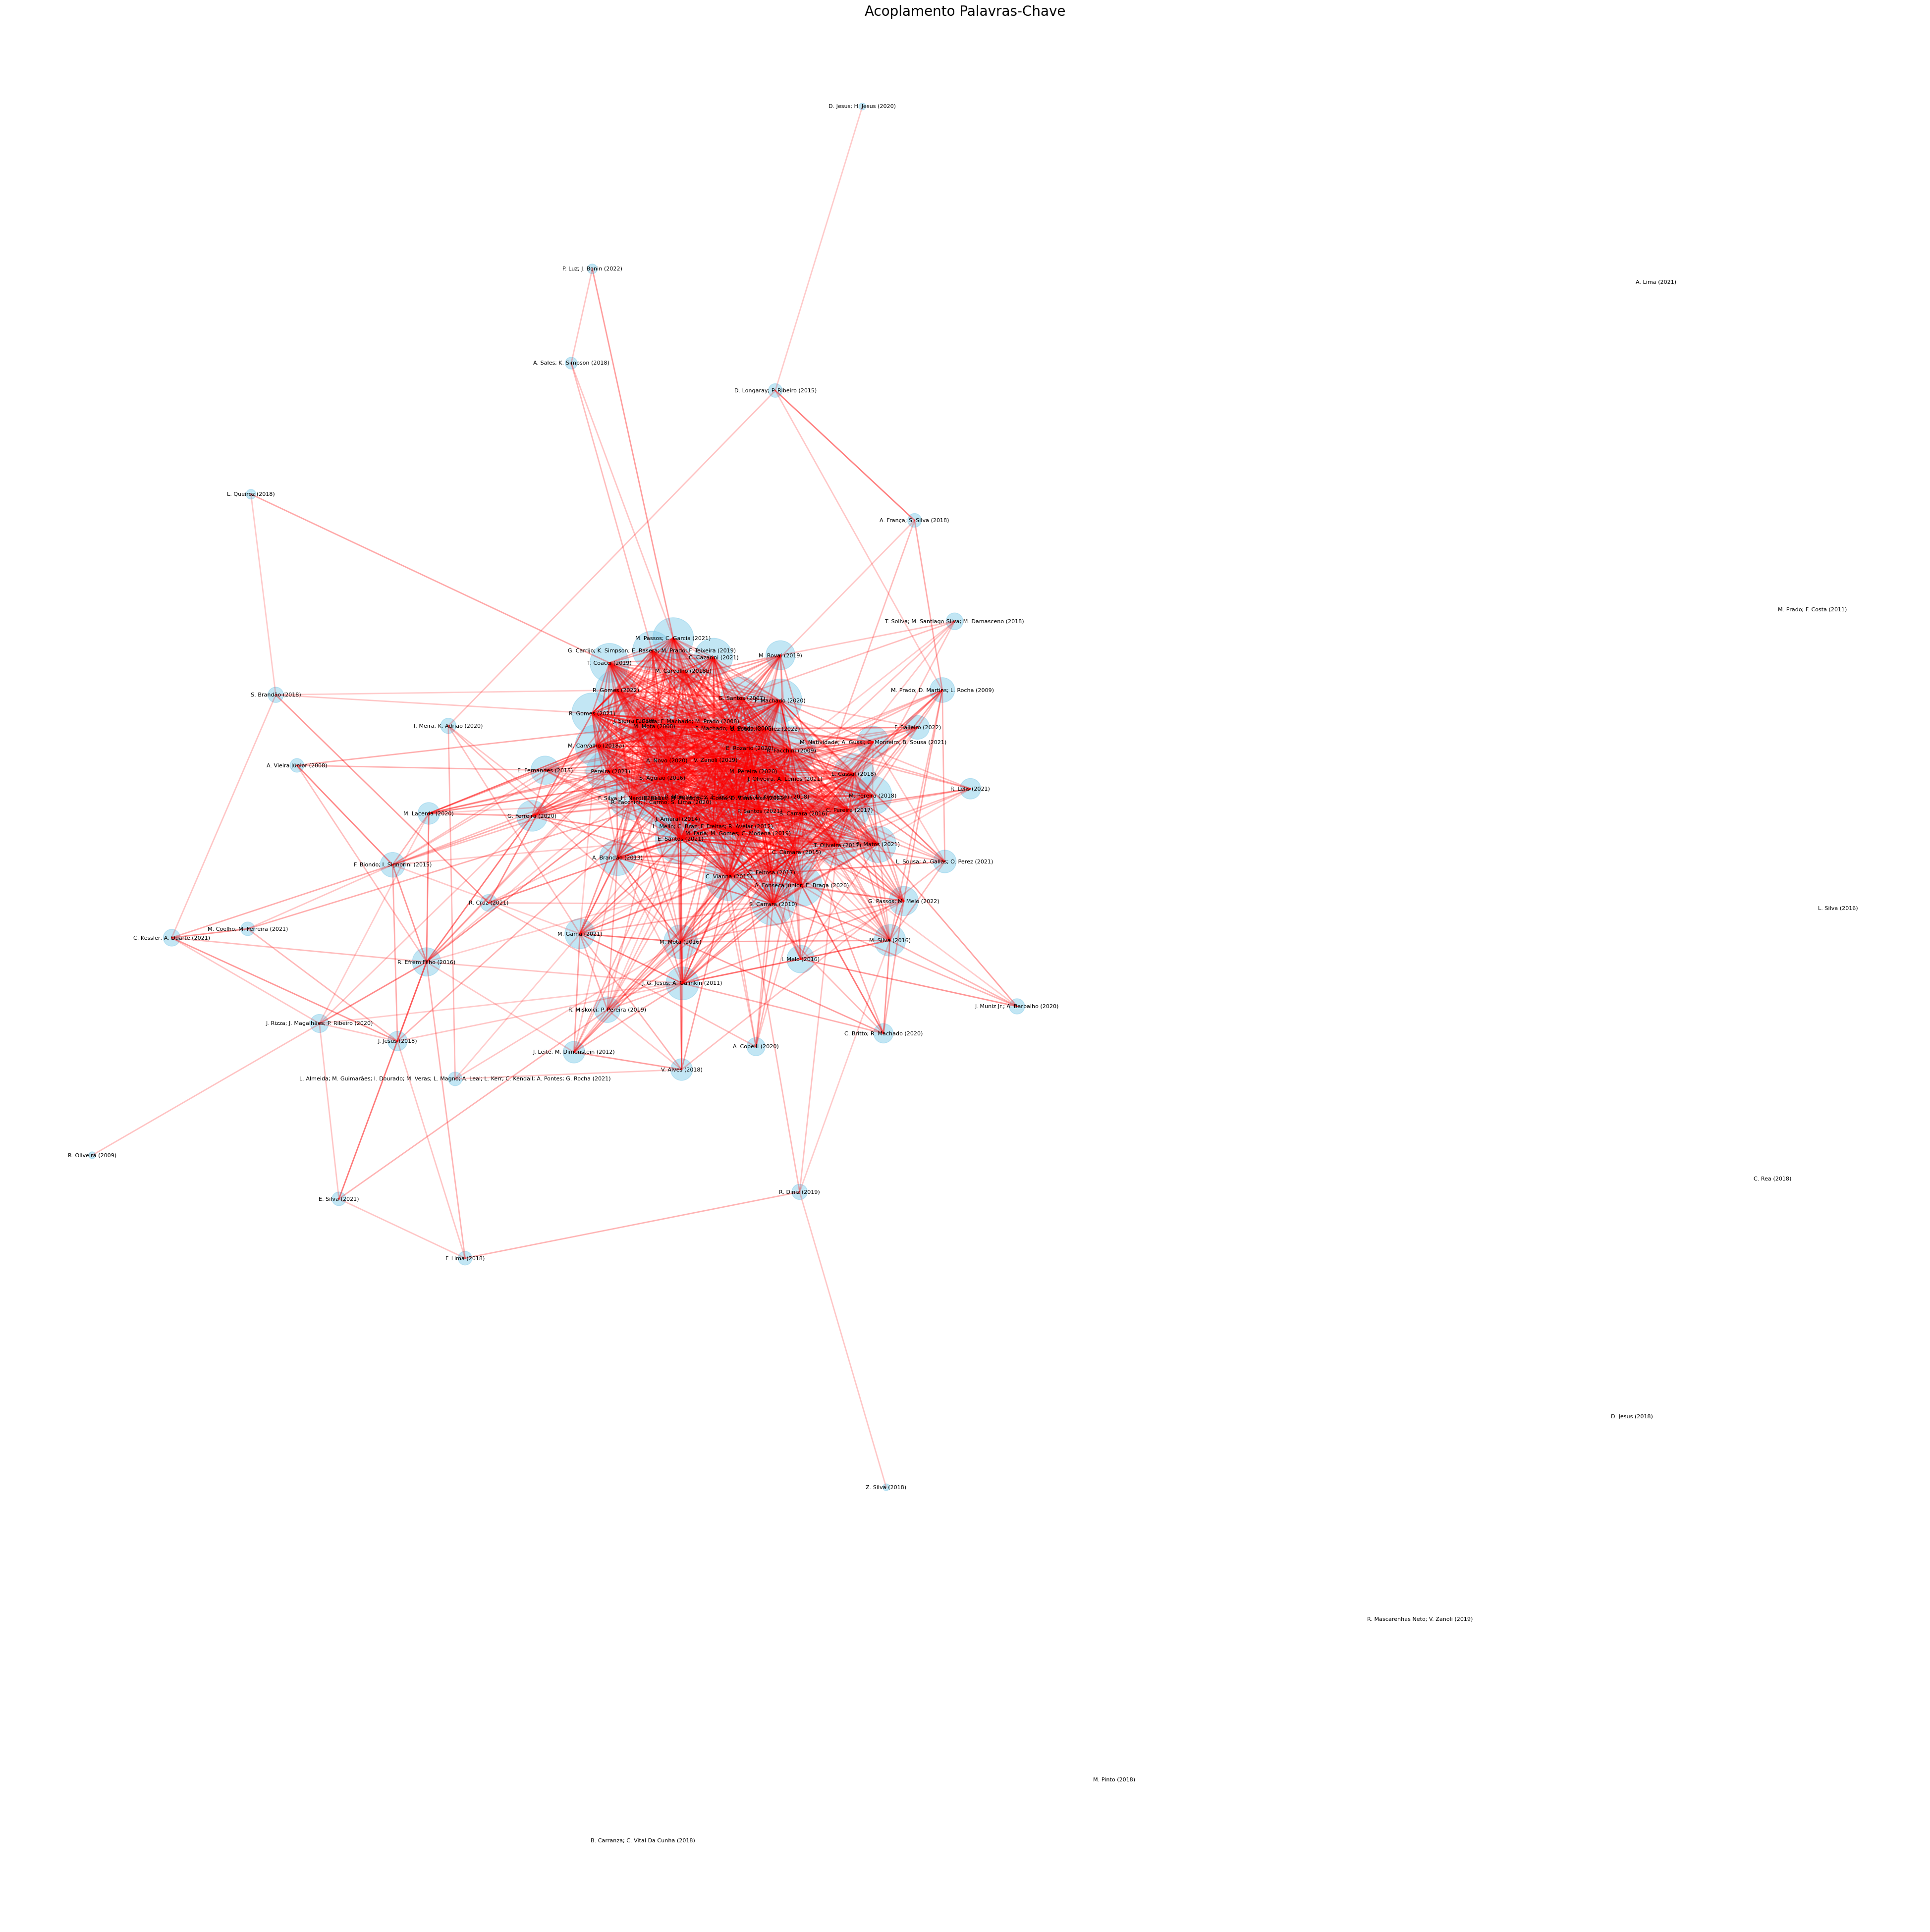

In [17]:
# Criar e exibir o gráfico de rede para Palavras-Chave
criar_grafo(df_filt_palavras_chave, 'Acoplamento Palavras-Chave')

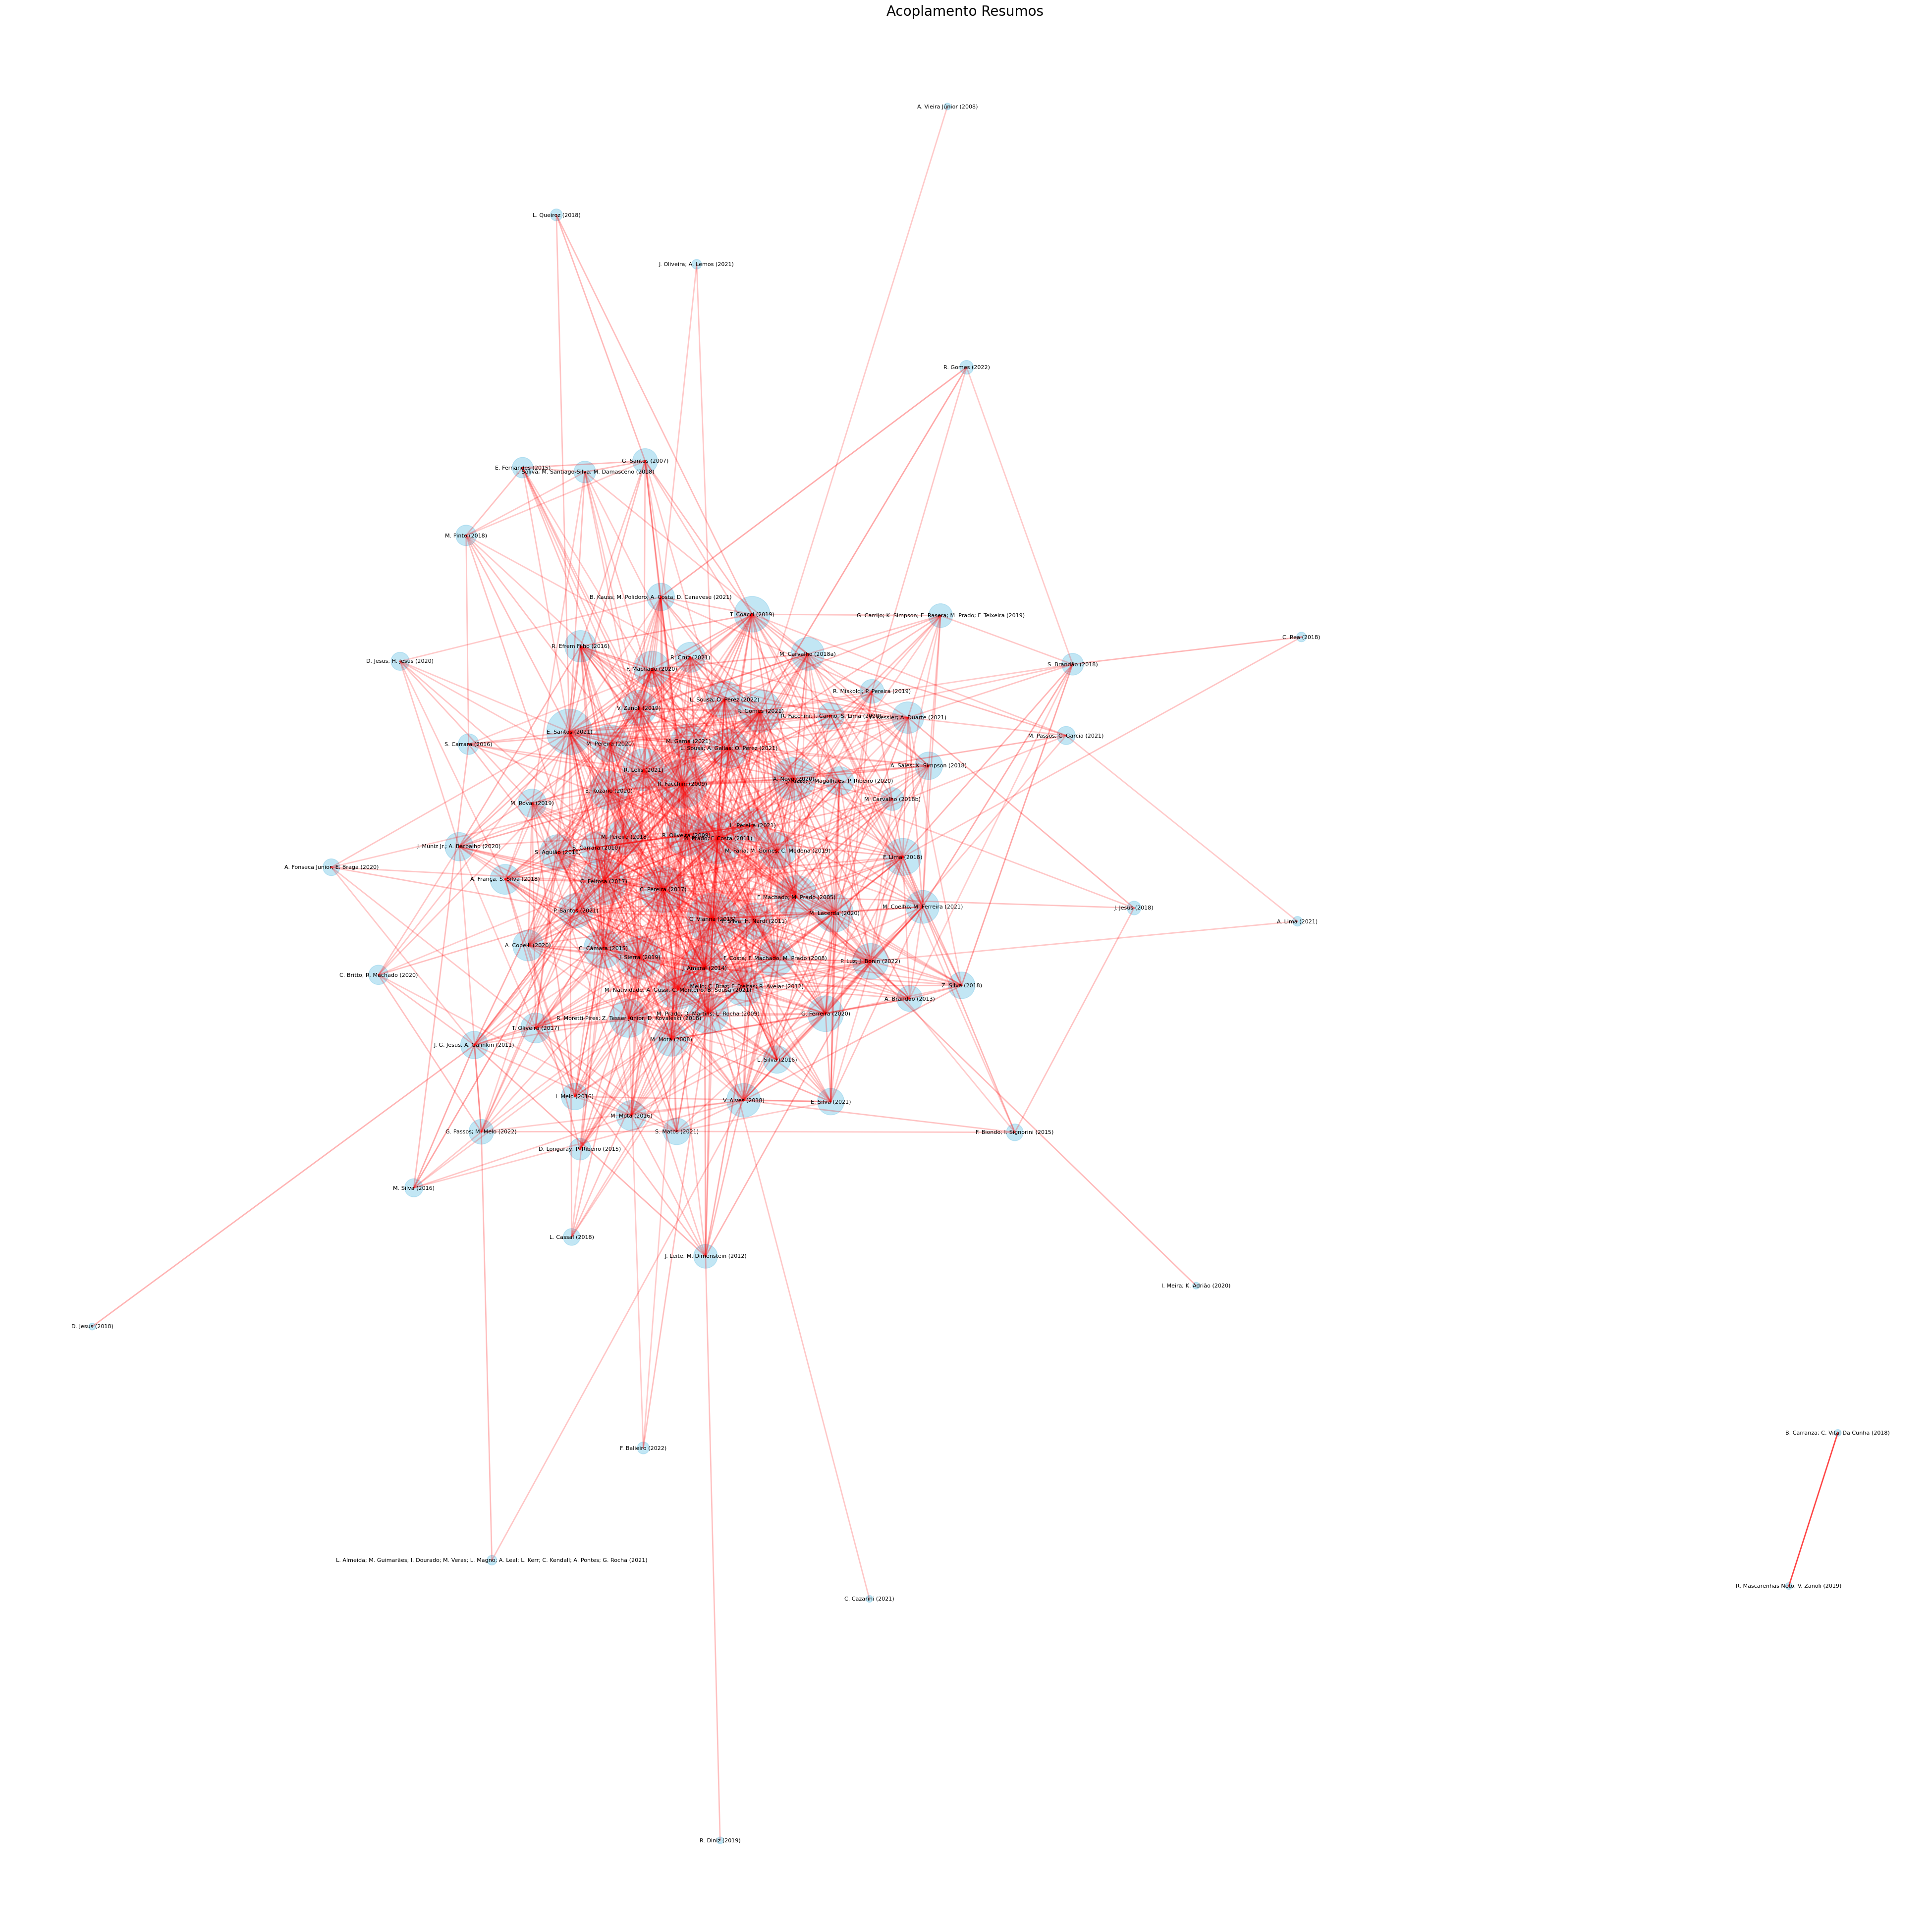

In [18]:
# Criar e exibir o gráfico de rede para Resumos
criar_grafo(df_filt_resumos, 'Acoplamento Resumos')